In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

In [6]:
# Load the heart disease dataset
df = pd.read_csv("data/heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [7]:
# Drop irrelevant columns: 'id', 'dataset'
df = df.drop(columns=['id', 'dataset'])

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [8]:
# Check for missing values and handle them (if any)
print("Missing values:\n", df.isnull().sum())

Missing values:
 age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [15]:
# check the non-null counts before deciding on how to handle missing values
data_info = df.info()

data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [21]:
# Impute missing values for 'ca', 'thal', and 'slope' using the mode (most frequent value) since they have categorical values.
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)
df['slope'].fillna(df['slope'].mode()[0], inplace=True)
df['exang'].fillna(df['exang'].mode()[0], inplace=True)
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)


# Impute the rest missing values for numerical columns using the mean
df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)
df['chol'].fillna(df['chol'].mean(), inplace=True)
df['thalch'].fillna(df['thalch'].mean(), inplace=True)
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)


# Check if there are any remaining missing values
print("Remaining missing values after imputation:\n", df.isnull().sum())

Remaining missing values after imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


/var/folders/lm/zxnm47v541n6yrnhmqlrdhsr0000gn/T/ipykernel_6077/2015021287.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(df['ca'].mode()[0], inplace=True)
/var/folders/lm/zxnm47v541n6yrnhmqlrdhsr0000gn/T/ipykernel_6077/2015021287.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [23]:
# Set up seaborn style for better aesthetics
sns.set(style="whitegrid")

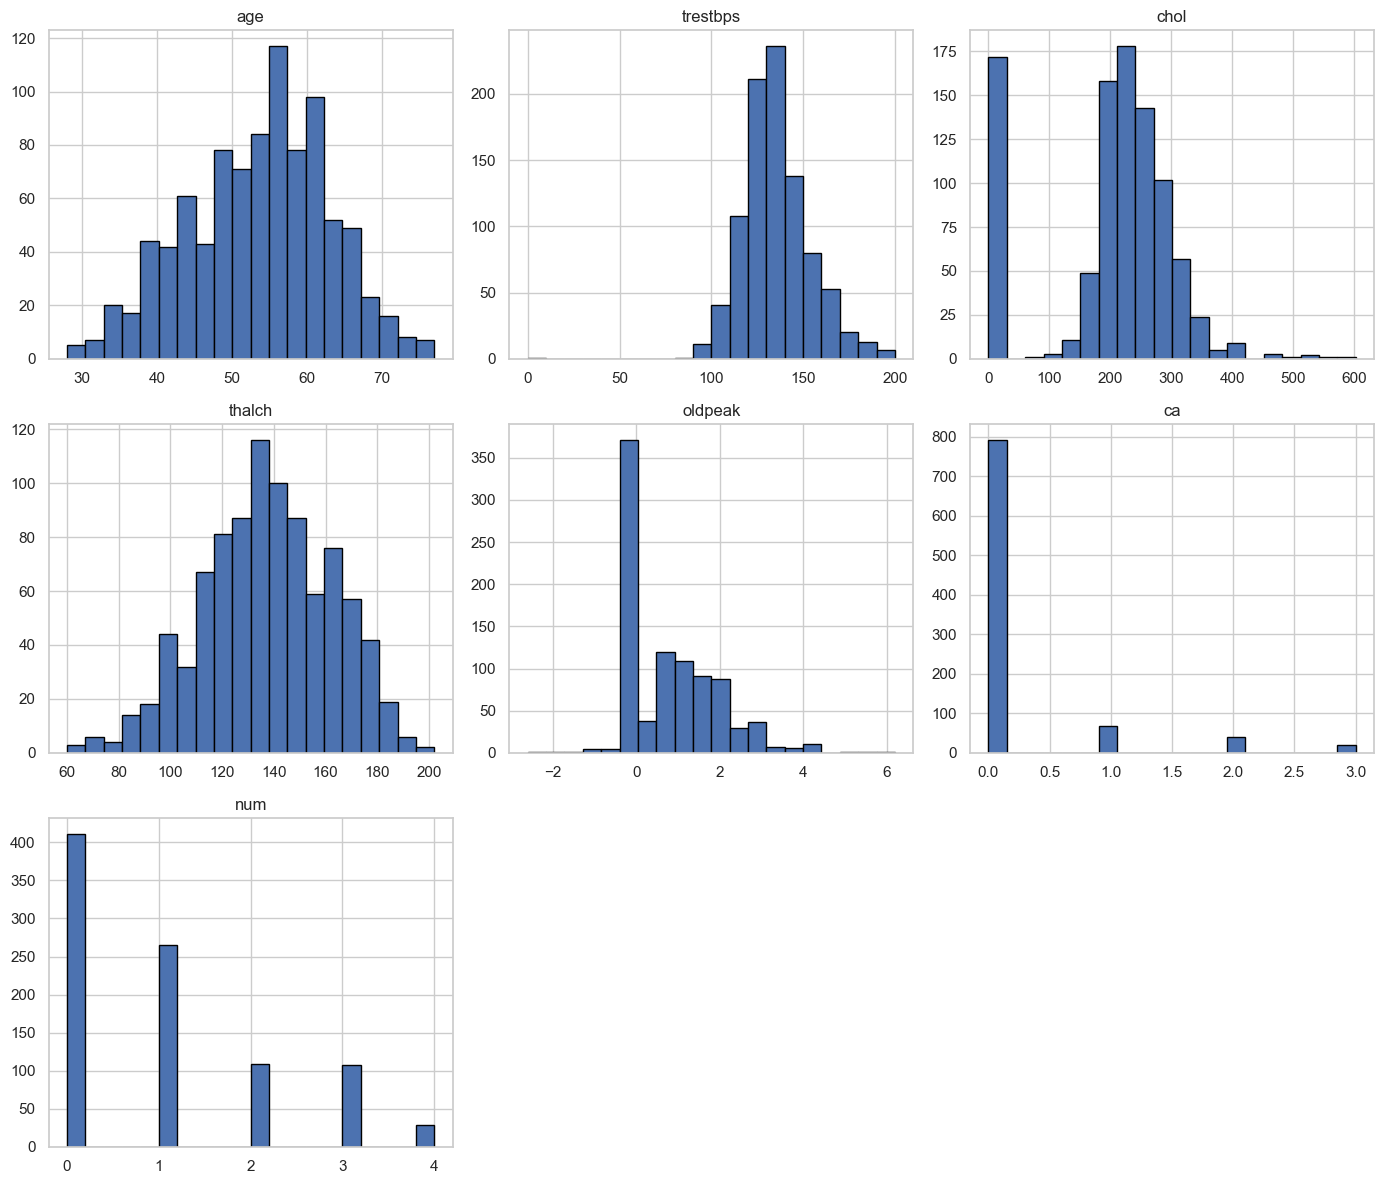

In [24]:
# 1. Distribution of numerical variables using histograms
df.hist(figsize=(14, 12), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

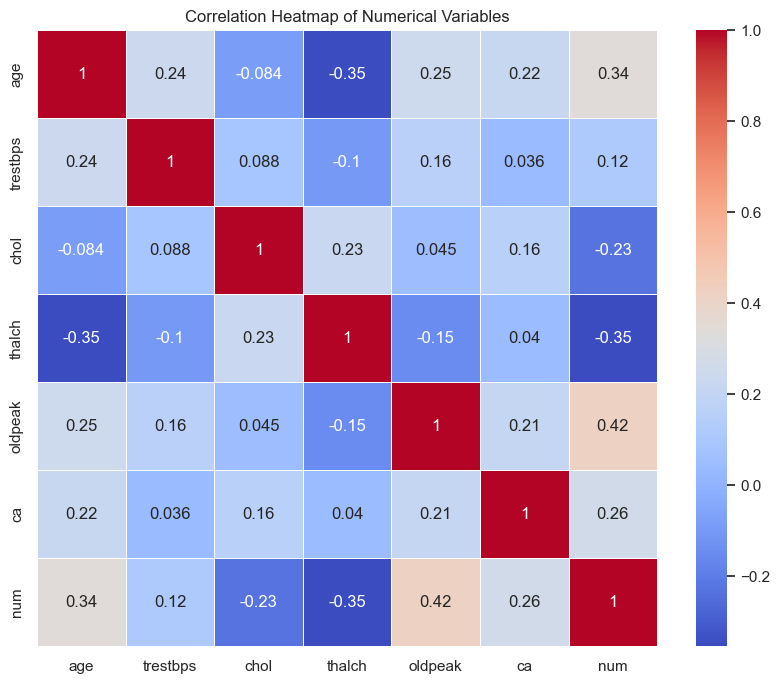

In [27]:
# 2. Correlation heatmap

# Select only numerical columns for correlation
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix using only numerical columns
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

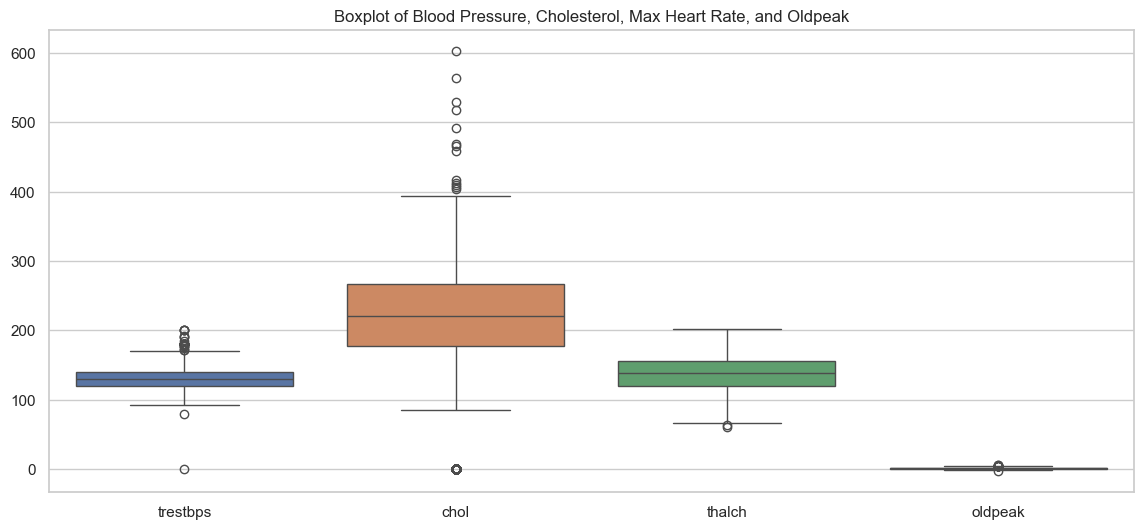

In [28]:
# 3. Boxplots for detecting outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[['trestbps', 'chol', 'thalch', 'oldpeak']])
plt.title('Boxplot of Blood Pressure, Cholesterol, Max Heart Rate, and Oldpeak')
plt.show()

/var/folders/lm/zxnm47v541n6yrnhmqlrdhsr0000gn/T/ipykernel_6077/4091566107.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cp', palette='Set2')


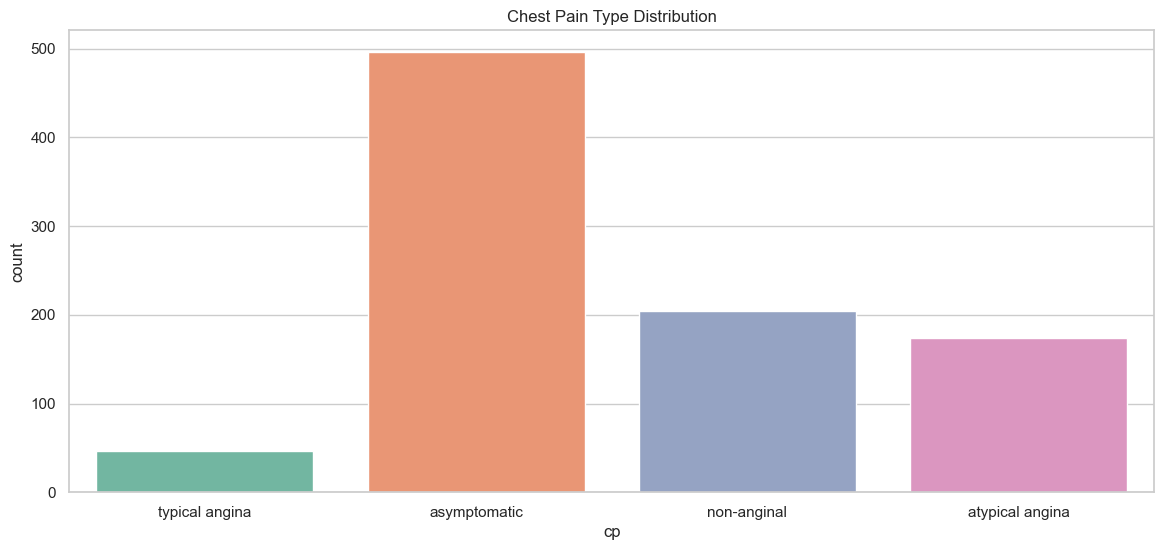

In [29]:
# 4. Bar plot for categorical variables
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='cp', palette='Set2')
plt.title('Chest Pain Type Distribution')
plt.show()

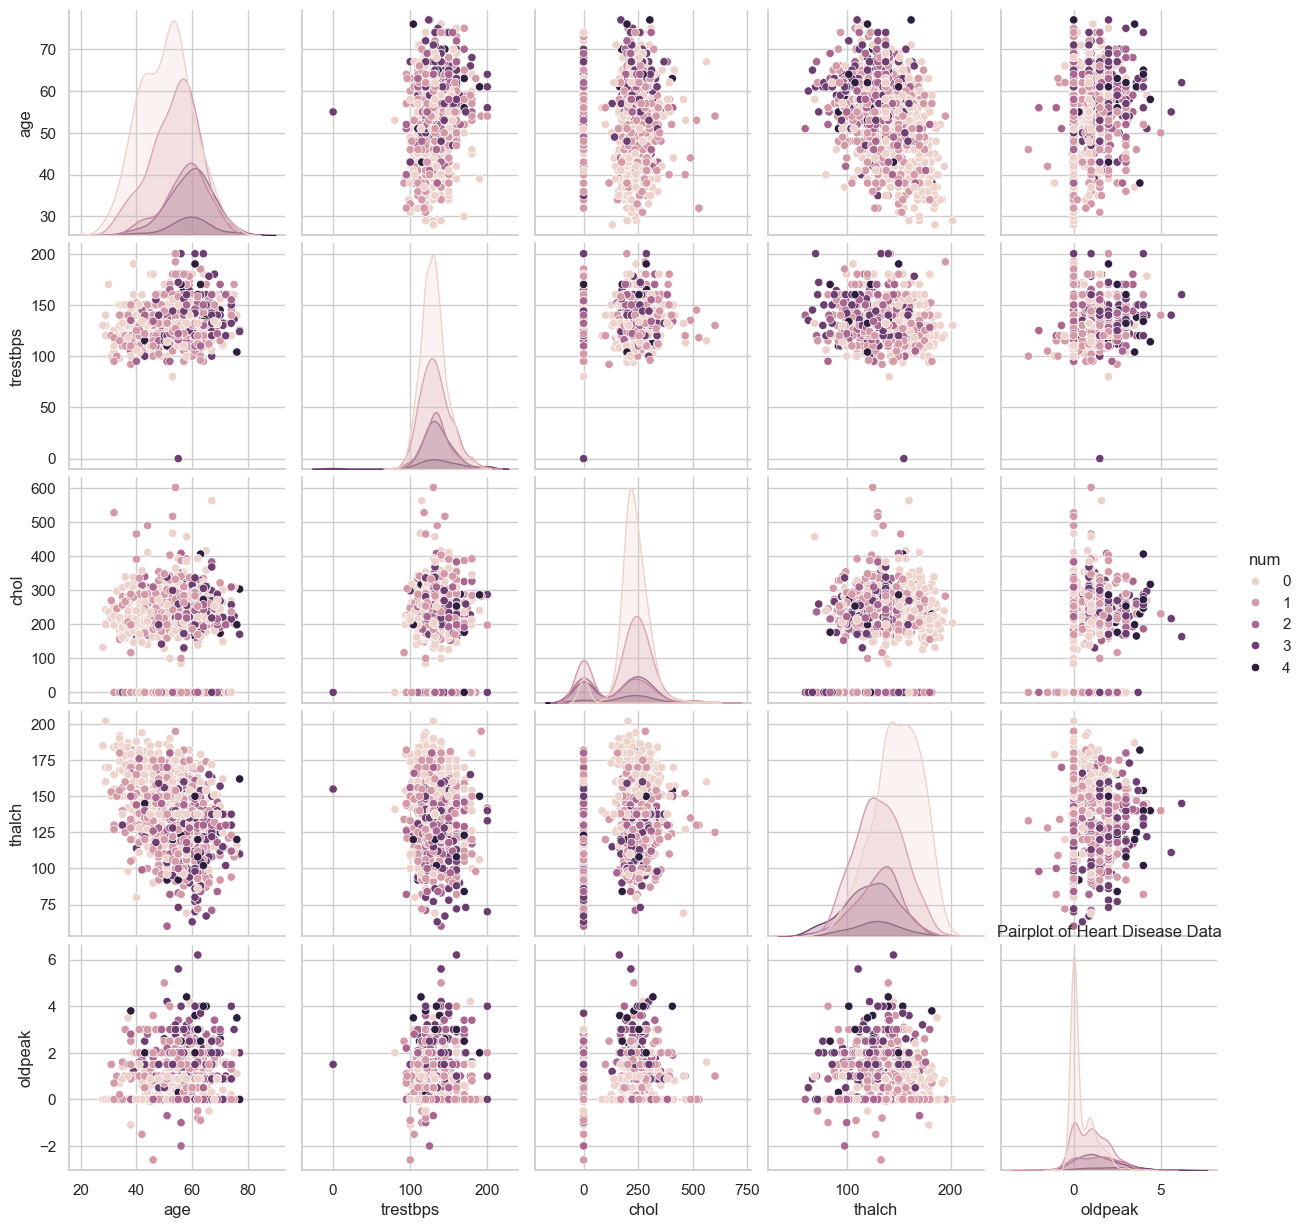

In [30]:
# 5. Pairplot to visualize relationships between variables
sns.pairplot(df, vars=['age', 'trestbps', 'chol', 'thalch', 'oldpeak'], hue='num')
plt.title('Pairplot of Heart Disease Data')
plt.show()

/var/folders/lm/zxnm47v541n6yrnhmqlrdhsr0000gn/T/ipykernel_6077/632427956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sex', palette='Set2')


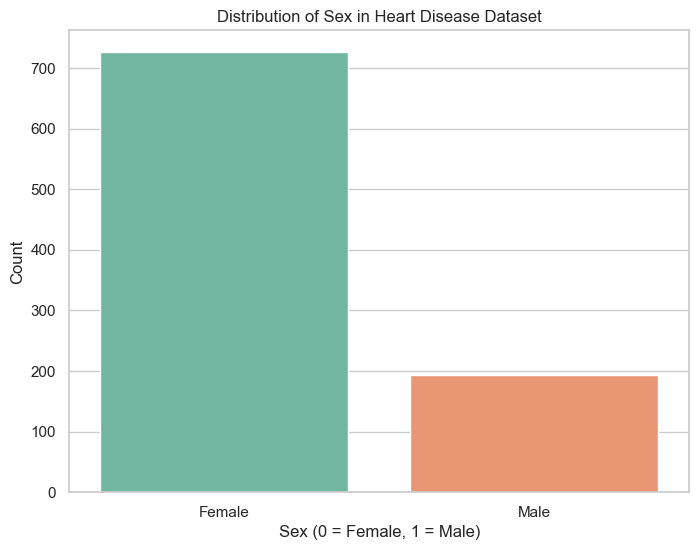

In [31]:
# Bar plot for the distribution of sex
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', palette='Set2')
plt.title('Distribution of Sex in Heart Disease Dataset')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])  # Renaming ticks for clarity
plt.show()

In [33]:
# Step 1: Preprocess data for clustering
# Select numerical features for clustering
features = df.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [35]:
# Step 2: K-Means Clustering
# 2.1. Optimize number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

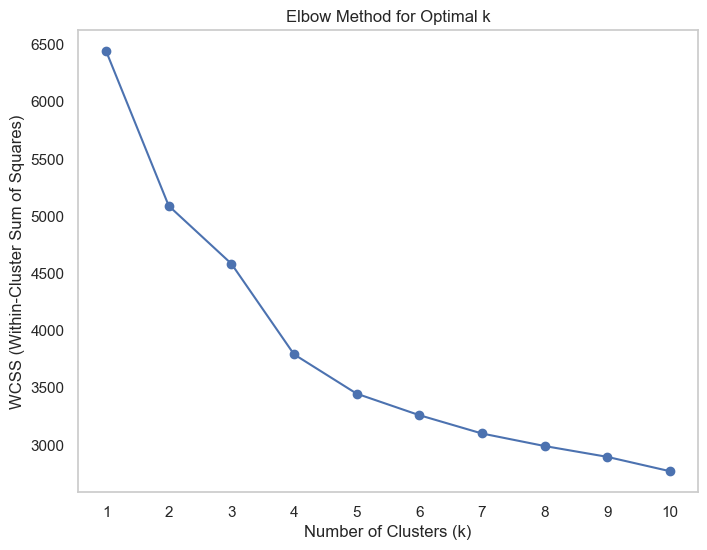

In [36]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


In [37]:
# 2.2. Apply K-Means with the chosen k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

In [38]:
# Step 3: Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(scaled_features)

In [39]:
# Step 4: DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on your data
dbscan_labels = dbscan.fit_predict(scaled_features)

In [40]:
# Step 5: Evaluate clustering performance
# Silhouette Score
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
hierarchical_silhouette = silhouette_score(scaled_features, hierarchical_labels)
dbscan_silhouette = silhouette_score(scaled_features, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1


In [41]:
# Davies-Bouldin Index
kmeans_db_index = davies_bouldin_score(scaled_features, kmeans_labels)
hierarchical_db_index = davies_bouldin_score(scaled_features, hierarchical_labels)
dbscan_db_index = davies_bouldin_score(scaled_features, dbscan_labels) if len(set(dbscan_labels)) > 1 else float('inf')


In [42]:
# Print results
print(f"K-Means Silhouette Score: {kmeans_silhouette}, Davies-Bouldin Index: {kmeans_db_index}")
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette}, Davies-Bouldin Index: {hierarchical_db_index}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}, Davies-Bouldin Index: {dbscan_db_index}")

K-Means Silhouette Score: 0.21543979484491824, Davies-Bouldin Index: 1.580717509541567
Hierarchical Silhouette Score: 0.21400169897543775, Davies-Bouldin Index: 1.655952189789793
DBSCAN Silhouette Score: -0.3572838942143382, Davies-Bouldin Index: 2.1554325021870158


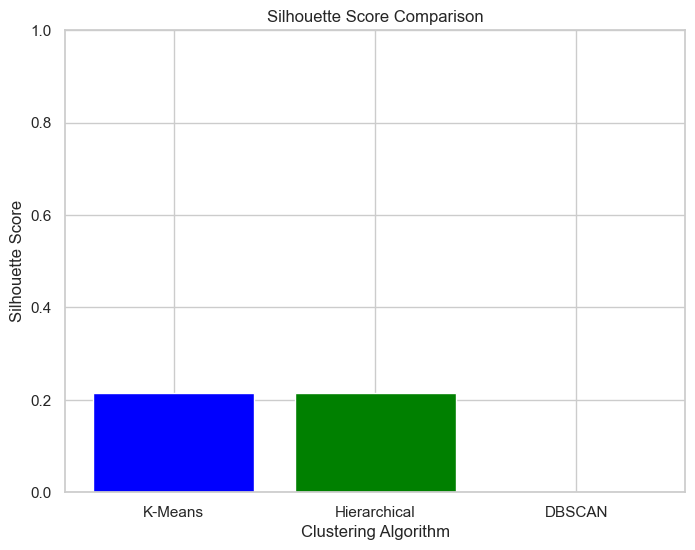

In [43]:
# Silhouette Scores for each clustering algorithm
silhouette_scores = [kmeans_silhouette, hierarchical_silhouette, dbscan_silhouette]
algorithms = ['K-Means', 'Hierarchical', 'DBSCAN']

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.bar(algorithms, silhouette_scores, color=['blue', 'green', 'red'])
plt.title('Silhouette Score Comparison')
plt.xlabel('Clustering Algorithm')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)  # Silhouette scores range between -1 and 1
plt.show()

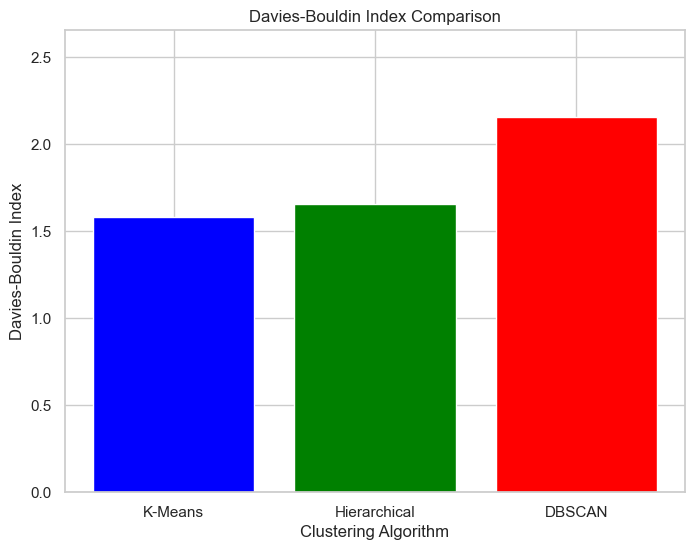

In [44]:
# Davies-Bouldin Index for each clustering algorithm
davies_bouldin_scores = [kmeans_db_index, hierarchical_db_index, dbscan_db_index]

# Plot Davies-Bouldin Index
plt.figure(figsize=(8, 6))
plt.bar(algorithms, davies_bouldin_scores, color=['blue', 'green', 'red'])
plt.title('Davies-Bouldin Index Comparison')
plt.xlabel('Clustering Algorithm')
plt.ylabel('Davies-Bouldin Index')
plt.ylim(0, max(davies_bouldin_scores) + 0.5)  # Adjust ylim to the range of your DB index
plt.show()

## Conclusion:     

- Based on both the **Silhouette Score** and **Davies-Bouldin Index**, **K-Means** outperformed both Hierarchical Clustering and DBSCAN.     

- **K-Means** is the best choice for clustering this dataset, although the clustering quality is still moderate.       

- **DBSCAN** is the least effective method for this dataset, as its negative silhouette score and high Davies-Bouldin Index indicate poor clustering performance.      

Thus, **K-Means** is recommended for this specific heart disease dataset, as it provides the most balanced results between cluster separation and cohesion. Further fine-tuning or a different approach might be required for improving cluster definition.